# Mathematics of Machine Learning
## Chapter 2: Linear predictors
### Section 2.1: The Perceptron algorithm

#### Python script to reproduce the example of the perceptron algorithm.

#### Preliminaries
(a) Loading required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy  # for optimization algorithm
import matplotlib
# change font size for all matplotlib plots
matplotlib.rc('font', size=16)

(b) Implementing the perceptron algorithm

In [6]:
def my_perceptron(x, y, b=1, n_iter=int(1e6), rng=np.random.default_rng(seed=42)):
    """
    This function executes the perceptron algorithm from section 3.1.

    By means of the third (optional) argument it shall be distinguished whether a homogeneous linear hypothesis 
    is to be learned or not.

    :param x:      (d, m)-Matrix consisting of the m training features in R^d
    :param y:      (m)-Vector consisting of the m associated labels {-1, +1}
    :param b:      Optional argument that learns a homogeneous linear hypothesis from the data for the value 0, 
                   otherwise a general linear   hypothesis
    :param n_iter: Maximum number of interations for the algorithm (by default infinity)

    :returns:
      - w     Vector containing the learned weights and bias in the form (w_1, w_2, ... w_d, b)
      - T     Integer of the number of executed steps in the algorithm
      - ws    Matrix with T+1 columns, the t-th column contains the t-th step Iterated of the procedure
      - RSs   Row vector containing the empirical risk for each vector ws

    """

    # Reading the dimension d and the data number m from x and y, respectively.
    d = x.shape[0]
    m = y.shape[0]

    # Case discrimination, whether homogeneous hypothesis should be learned
    xb = np.append(x, np.ones((1, m)), axis=0) if b==1 else x

    # Function to check the constraints
    check = lambda w, xb, y, m: y * (w @ xb)

    # Calculation of the obtained empirical risk
    RS = lambda chk: np.mean(chk <= 0)

    # Initialize extended weight vector
    w = np.zeros(d+b)
    # First entry in ws:
    ws = [ w ]
    # Empirical risk of the current w:
    RSs = [ RS(check(w, xb, y, m)) ]
    # Iteration variable of while loop
    t = 0
    while np.min(check(w, xb, y, m)) <= 0 and t < n_iter:
        # Find all unsatisfied constraints
        
        ch = check(w, xb, y, m)
        inds = np.where(ch<=0)[0]
        
        # 2. ch = check(w, xb, y, m)
        # 2. inds = np.where(ch>0)[0]
        
        # 3. ch = check(w, xb, y, m)
        # 3. inds = np.where(ch>0)
        
        # 4. ch = check(w, xb, y, m)
        # 4. inds = np.where(ch<=0)
        
        # Select an unfulfilled constraint
        
        i = rng.choice(inds)
        
        # Update according to iteration rule
        
        v = xb[:, i]
        w = w + y[i] * v
        
        # 2. v = xb[:, i-1]
        # 2. w = w + y[i-1] * v
        
        # 3. v = xb[:, inds]
        # 3. w = w + y[inds] * v
        
        # 4. v = xb[:, i]
        # 4. w = w - y[i] * v
              
        # Save current w in ws
        ws.append(w)

        # Calculate empirical risk and store in RSs
        RSs.append( RS(check(w, xb, y, m)) )

        # Increase step counter
        t += 1

    return [w, t, np.array(ws), np.array(RSs)]

#### (0) Preparation
Generate the training data $x,y$

In [2]:
# Number of data
m = 25
rng = np.random.default_rng(seed=42) # initialising RNG
x = rng.uniform(low=-3, high=3, size=(2, m))  # each x in U[-3, 3)

# true separating hyperplane
w_true = np.array([1, 2])

# The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs.
y = np.sign(w_true @ x) + ((w_true @ x) == 0)


Plot the training data: First plot the true hyperplane for $x \in [-3,3]$, then add the classified points

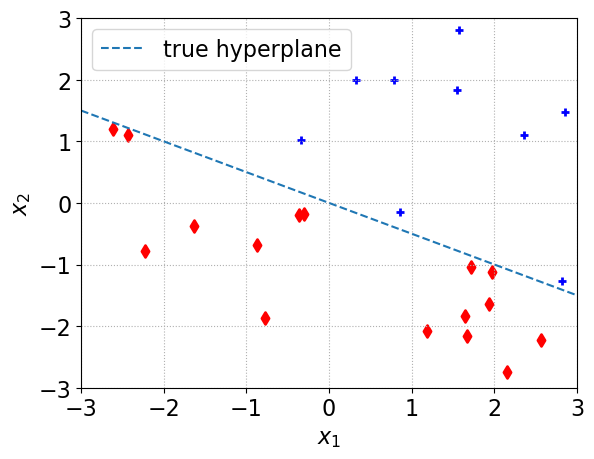

In [3]:
# indices of points with mark 1
inds = np.where(y==1)

# indices of points with mark -1
indm = np.where(y==-1)

# First plot the true hyperplane for x in [-3,3].
fig, ax = plt.subplots()
xvec = np.array([-3, 3])
yvec = -w_true[0]/w_true[1]*xvec
ax.plot(xvec, yvec, "--", label="true hyperplane")

# Then add the training data points according to its label
ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="d", linewidths = 2)

ax.legend()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.grid(linestyle='dotted')
plt.show()

#### (2) Run the Perceptron algorithm for the training data

In [7]:
# Apply the algorithm to the data with b = 0 fixed.
[w, T, ws, RSs] = my_perceptron(x=x, y=y, b=0, n_iter=10000, rng=np.random.default_rng(seed=42))

# Print number of iterations
print(T)

6


Plot the results

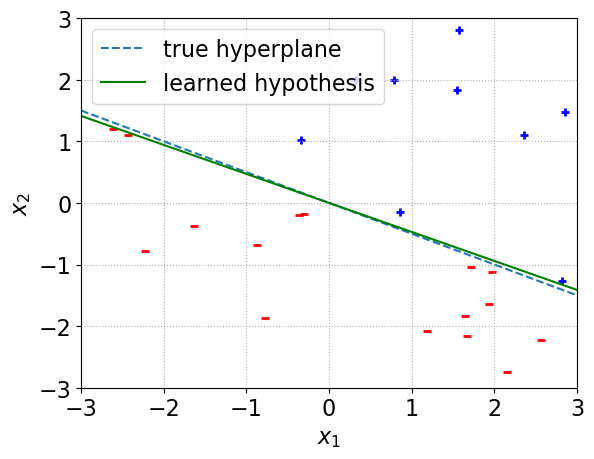

In [8]:
# Plotting true and learned hyperplane for x in [-3,3].
fig, ax = plt.subplots()
xvec = np.array([-3, 3])
yvec_true = -w_true[0]/w_true[1]*xvec
yvec = -w[0]/w[1]*xvec
ax.plot(xvec, yvec_true, "--", label="true hyperplane")

ax.plot(xvec, yvec, "g", label="learned hypothesis")

ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="_", linewidths = 2)

ax.legend()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.grid(linestyle='dotted')
plt.show()

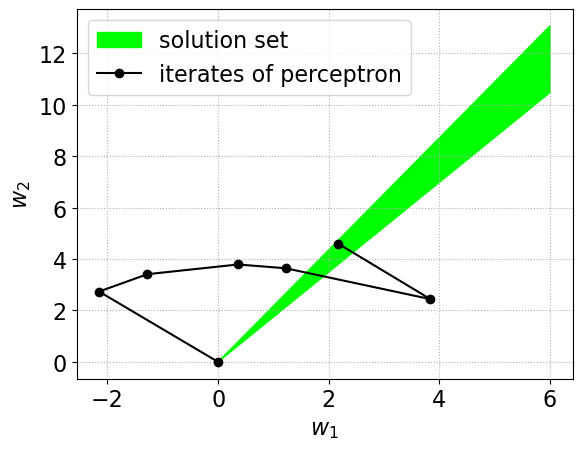

In [9]:
# Plotting iterates of Perceptron algorithm
fig, ax = plt.subplots()

# Calculating the solution cone
A = np.tile(y, (2, 1)) * x
indAn = np.where(A[1,:]<0)
indAp = np.where(A[1,:]>0)
a_low = np.max(-A[0, indAp]/A[1, indAp])
a_up = np.min(-A[0, indAn]/A[1, indAn])
area_x = [0, 6, 6, 0]
area_y = [0, 6*a_low, 6*a_up, 0]

# Plotting
ax.fill(area_x, area_y, color='lime', label='solution set')
ax.plot(ws[:,0], ws[:,1], 'o-k', label='iterates of perceptron')
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.grid(linestyle='dotted')
ax.legend()
plt.show()